In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-info">
1. Решите следующие задания сначала с помощью онлайн-калькулятора, а затем самостоятельно с помощью Python:

— Вы работаете с рассылкой предложений перед “черной пятницей”, доля открываемых писем, исходя из заголовка письма в рассылках, обычно составляет 15% (конверсия). Вам хочется увеличить конверсию открываемых писем до 25% с помощью смайликов. Рассчитайте необходимый размер выборки. Сделай вывод. (В вашей базе рассылок около 40000 человек)

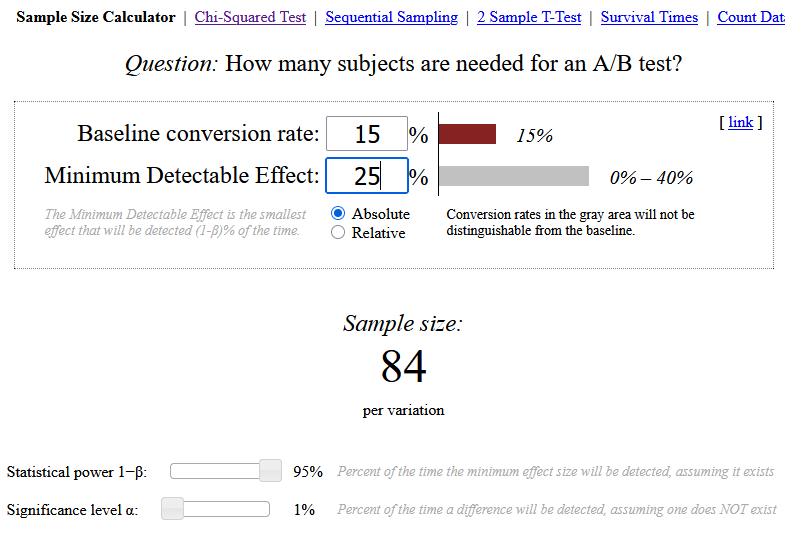

In [4]:
alpha = 0.05
beta = 80

def find_n(p0, pa, alpha=0.05, beta=0.05):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    sn = (np.sqrt(p0*(1 - p0))* za + np.sqrt(pa*(1 - pa))* zb)/(pa - p0)
    return sn**2

In [5]:
BCR = 15 / 100 # базовая конверсия в процентах
MDE = 25 / 100  # желанный эффект

find_n(BCR, MDE, alpha=0.05, beta=0.2)

np.float64(90.58526310162634)

<div class="alert alert-info">
— И вот вы теперь тестируете две версии рассылок. И заметили, что в одной версии конверсия 19%, а в другой 24%. Всего у вас 100 человек в рассылке. Является ли результат статистически значимым? Если нет, то сколько должно было человек, чтобы результат был уже статистически значим?

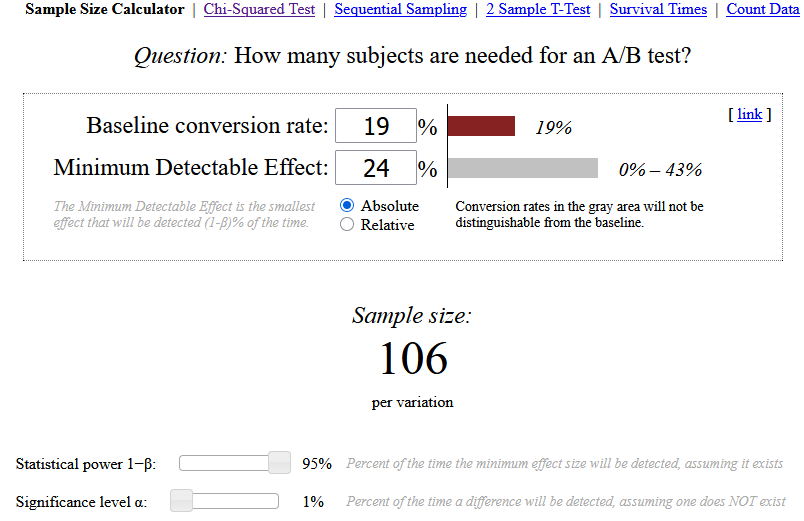

In [6]:
BCR = 19 / 100 # базовая конверсия в процентах
MDE = 24 / 100  # желанный эффект

find_n(BCR, MDE, alpha=0.05, beta=0.2)

np.float64(403.78474826499956)

<div class="alert alert-info">
— Вас повысили до старшего аналитика. Ваша первая задача на новой позиции, определить какой поставщик товаров (A или B) позволяет вам получить наибольшую оценку качества. У вас две группы оценок для A и B. Среднее группы A = 45, дисперсия группы A = 4, средние группы B = 40, дисперсия группы B = 3. Является ли группа А лучшей, если опираться на статистическую значимость? А если бы обе дисперсии были равны 1?

In [14]:
table = [[45, 43], [40, 38.27]]

ch2, pvalue, dof, expected = stats.chi2_contingency(table)

print(pvalue)
if pvalue < 0.05:
    print('Есть статистическая значимость')
else:
    print('Нет статистической значимости')

1.0
Нет статистической значимости


In [13]:
table = [[45, 44], [40, 39]]

ch2, pvalue, dof, expected = stats.chi2_contingency(table)

print(pvalue)
if pvalue < 0.05:
    print('Есть статистическая значимость')
else:
    print('Нет статистической значимости')

1.0
Нет статистической значимости


<div class="alert alert-info">
— Вы планируете эксперимент по способам расстановки продуктов на полке. Вы предполагаете, что некоторые пары продуктов надо класть вместе. В качестве метрики у вас средний чек покупок. Вы проводите эксперимент в 1000 магазинах. Средний чек в группе A = 870 рублей, дисперсия этого чека - 80 рублей. Какое минимальное значение метрики надо получить для группы B, чтобы после всей 1000 экспериментов с каждым магазином мы могли с уверенностью сказать, что тестируемая гипотеза в группе B верна?

In [19]:
Xa = 870
Var_a = 80
Var_b = 80
n_a = 1000
n_b = 1000
t = 0.0627

Xb = np.sqrt((Var_a / n_a) + (Var_b / n_b)) * t + Xa

print(Xb)


870.02508
